In [31]:
import os


import matplotlib.pyplot as plt
import pandas as pd
from project.model import get_inputs
from project.utils import reindex_mi, format_ax

In [19]:
resirf_inputs = get_inputs(variables=['buildings', 'energy_prices', 'income'],
                           building_stock=os.path.join('project', 'input', 'stock', 'buildingstock_example.csv'))
buildings = resirf_inputs['buildings']
prices = resirf_inputs['energy_prices'].loc[2018, :]
income = resirf_inputs['income']
income.index.names = ['Income tenant']

2022-12-07 17:50:55,813 - 8424 - log_ - INFO - Creating AgentBuildings object
2022-12-07 17:50:55,813 - 8424 - log_ - INFO - Creating AgentBuildings object
2022-12-07 17:50:55,813 - 8424 - log_ - INFO - Creating AgentBuildings object


### Heating consumption function of indoor temperature

<AxesSubplot:>

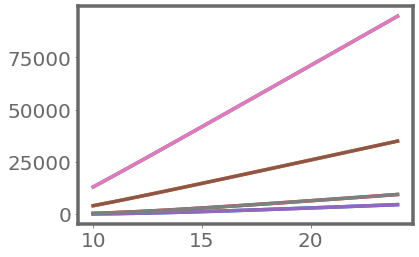

In [35]:
rslt = {}
temp_int_list = range(10, 25)
for temp_int in temp_int_list:
    heating_consumption = buildings.heating_consumption(temp_int=temp_int)
    heating_consumption *= buildings.surface
    rslt.update({temp_int: heating_consumption})

rslt = pd.DataFrame(rslt)
rslt.T.plot(legend=False)

In [7]:
temp = buildings.optimal_temperature(prices)
temp

True  Owner-occupied  D1   D1   Multi-family   Natural gas-Performance boiler  0.1  0.2  0.1  1.6    17.988599
                                               Natural gas-Standard boiler     2.5  2.5  2.5  4.5    12.984267
                                Single-family  Natural gas-Standard boiler     2.5  2.5  2.5  4.5    10.483830
                                               Natural gas-Performance boiler  0.1  0.2  0.1  1.6    16.634625
                      D10  D10  Multi-family   Natural gas-Performance boiler  0.1  0.2  0.1  1.6    21.049694
                                               Natural gas-Standard boiler     2.5  2.5  2.5  4.5    17.730865
                                Single-family  Natural gas-Standard boiler     2.5  2.5  2.5  4.5    15.502680
                                               Natural gas-Performance boiler  0.1  0.2  0.1  1.6    20.184449
dtype: float64

Existing  Occupancy status  Income owner  Income tenant  Housing type   Heating system                  Wall  Floor  Roof  Windows
True      Owner-occupied    D1            D1             Multi-family   Natural gas-Performance boiler  0.1   0.2    0.1   1.6         2222.560987
                                                                        Natural gas-Standard boiler     2.5   2.5    2.5   4.5        10279.500669
                                                         Single-family  Natural gas-Standard boiler     2.5   2.5    2.5   4.5        15717.910934
                                                                        Natural gas-Performance boiler  0.1   0.2    0.1   1.6         4020.466973
                            D10           D10            Multi-family   Natural gas-Performance boiler  0.1   0.2    0.1   1.6         3375.811631
                                                                        Natural gas-Standard boiler     2.5   2.5    2.5   4.5        

In [10]:
marginal_heating_consumption = buildings.heating_consumption(marginal=True, climate=None)
# display(marginal_heating_consumption)
marginal_heating_consumption *= buildings.surface
marginal_bill = buildings.energy_bill(prices, marginal_heating_consumption)
marginal_bill

Existing  Occupancy status  Income owner  Income tenant  Housing type   Heating system                  Wall  Floor  Roof  Windows
True      Owner-occupied    D1            D1             Multi-family   Natural gas-Performance boiler  0.1   0.2    0.1   1.6         33.590675
                                                                        Natural gas-Standard boiler     2.5   2.5    2.5   4.5        176.991087
                                                         Single-family  Natural gas-Standard boiler     2.5   2.5    2.5   4.5        458.401598
                                                                        Natural gas-Performance boiler  0.1   0.2    0.1   1.6         61.346395
                            D10           D10            Multi-family   Natural gas-Performance boiler  0.1   0.2    0.1   1.6         33.590675
                                                                        Natural gas-Standard boiler     2.5   2.5    2.5   4.5        176.991087

In [26]:
data = pd.concat((temp, buildings.consumption_actual(prices), marginal_bill, reindex_mi(income, buildings.stock.index)), keys=['opt. temp.', 'conso', 'marginal bill', 'income'], axis=1)
data

opt. temp.  \
True Owner-occupied D1  D1  Multi-family  Natural gas-Performance boiler 0.1 0.2 0.1 1.6   17.988599   
                                          Natural gas-Standard boiler    2.5 2.5 2.5 4.5   12.984267   
                            Single-family Natural gas-Standard boiler    2.5 2.5 2.5 4.5   10.483830   
                                          Natural gas-Performance boiler 0.1 0.2 0.1 1.6   16.634625   
                    D10 D10 Multi-family  Natural gas-Performance boiler 0.1 0.2 0.1 1.6   21.049694   
                                          Natural gas-Standard boiler    2.5 2.5 2.5 4.5   17.730865   
                            Single-family Natural gas-Standard boiler    2.5 2.5 2.5 4.5   15.502680   
                                          Natural gas-Performance boiler 0.1 0.2 0.1 1.6   20.184449   

                                                                                                 conso  \
True Owner-occupied D1  D1  Multi-family  Natural gas-Performance boiler 0.1 0.2 0.1 1.6   2222.560987   
                                          Natural gas-Standard boiler    2.5 2.5 2.5 4.5  10279.500669   
                            Single-family Natural gas-Standard boiler    2.5 2.5 2.5 4.5  15717.910934   
                                          Natural gas-Performance boiler 0.1 0.2 0.1 1.6   4020.466973   
                    D10 D10 Multi-family  Natural gas-Performance boiler 0.1 0.2 0.1 1.6   3375.811631   
                                          Natural gas-Standard boiler    2.5 2.5 2.5 4.5  20790.719647   
                            Single-family Natural gas-Standard boiler    2.5 2.5 2.5 4.5  44712.319717   
                                          Natural gas-Performance boiler 0.1 0.2 0.1 1.6   6549.110003   

                                                                                          marginal bill  \
True Owner-occupied D1  D1  Multi-family  Natural gas-Performance boiler 0.1 0.2 0.1 1.6      33.590675   
                                          Natural gas-Standard boiler    2.5 2.5 2.5 4.5     176.991087   
                            Single-family Natural gas-Standard boiler    2.5 2.5 2.5 4.5     458.401598   
                                          Natural gas-Performance boiler 0.1 0.2 0.1 1.6      61.346395   
                    D10 D10 Multi-family  Natural gas-Performance boiler 0.1 0.2 0.1 1.6      33.590675   
                                          Natural gas-Standard boiler    2.5 2.5 2.5 4.5     176.991087   
                            Single-family Natural gas-Standard boiler    2.5 2.5 2.5 4.5     458.401598   
                                          Natural gas-Performance boiler 0.1 0.2 0.1 1.6      61.346395   

                                                                                          income  
True Owner-occupied D1  D1  Multi-family  Natural gas-Performance boiler 0.1 0.2 0.1 1.6   10030  
                                          Natural gas-Standard boiler    2.5 2.5 2.5 4.5   10030  
                            Single-family Natural gas-Standard boiler    2.5 2.5 2.5 4.5   10030  
                                          Natural gas-Performance boiler 0.1 0.2 0.1 1.6   10030  
                    D10 D10 Multi-family  Natural gas-Performance boiler 0.1 0.2 0.1 1.6  102880  
                                          Natural gas-Standard boiler    2.5 2.5 2.5 4.5  102880  
                            Single-family Natural gas-Standard boiler    2.5 2.5 2.5 4.5  102880  
                                          Natural gas-Performance boiler 0.1 0.2 0.1 1.6  102880

<AxesSubplot:xlabel='opt. temp.', ylabel='conso'>

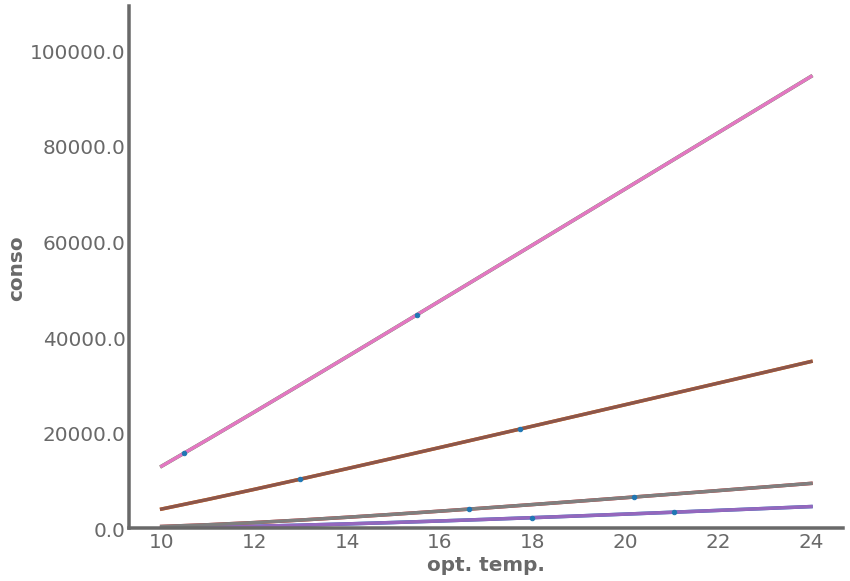

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12.8, 9.6))
rslt.T.plot(ax=ax, legend=False, zorder=-1)
data.plot(x='opt. temp.', y='conso', kind='scatter', ax=ax)
format_ax(ax)

<AxesSubplot:xlabel='opt. temp.', ylabel='conso'>

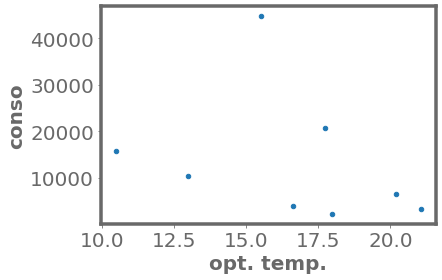

$$V(T) = V_{max} . (1 + e^{\alpha (T - T_{min})})$$

FOC:
$$V'(T*) = V_{max} . \alpha . e^{\alpha (T* - T_{min})})$$